In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import os
import pandas as pd

In [2]:
'''
找出 lgrb 中所有fits文件
'''
path = r'lgrb'
files = os.listdir(path)
files_fits = []
for name in files:
    keyword = 'fits'
    if keyword in name:
        files_fits.append(os.path.join(path, name))
        
'''
读入 csv 以获取坐标信息
'''
for name in files:
    keyword = 'csv'
    if keyword in name:
        file_csv = os.path.join(path, name)

In [3]:
def event_time(df,r,center_x,center_y):   # 
    x=np.array(df['X'])
    y=np.array(df['Y'])
    value=0.
    for i in range(len(x)):
        if (x[i]-center_x)**2+(y[i]-center_y)**2<=r**2:
            value=value+1.
        else:pass
    return value

F:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


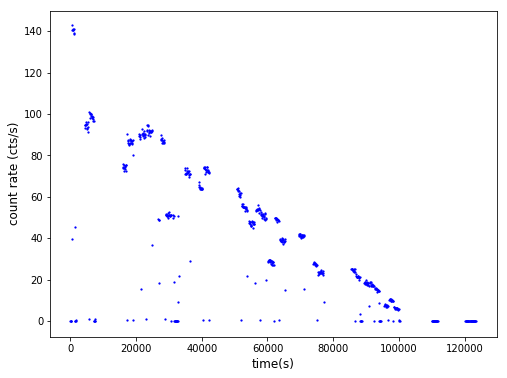

In [4]:
data_0 = Table.read(files_fits[0]).to_pandas()
time_0 = np.array(data_0['TIME'])
dt = 100   # 时间步长
fig = plt.figure(figsize=[8,6])

for m in range(len(files_fits)):
    data = Table.read(files_fits[m]).to_pandas()
    x = np.array(data['X'])
    y = np.array(data['Y'])
    PI=np.array(data['PI'])
        
    obs_info = pd.read_csv(file_csv)
    source_point = [obs_info[' X'][m], obs_info[' Y'][m]]   # 源中心点坐标

    x0, y0 = source_point[0], source_point[1]
    r0 = 40   # 源半径
    
    time = np.array(data['TIME'])   # 提取时间信息

    xgrade = np.arange(time.min(),time.max()+dt,dt)
    value = []
    for i in range(1,len(xgrade)):
        df = data[(data['TIME']>=xgrade[i-1]) & (data['TIME']<xgrade[i])]
        value.append(event_time(df,r0,x0,y0))
    value = np.array(value)
    rate = value/dt
    xgrade = xgrade-time_0.min()
    value_x = (xgrade[:-1]+xgrade[1:])/2.

    ax = fig.add_subplot(111)
    ax.set_xlabel('time(s)',fontsize=12)
    ax.set_ylabel('count rate (cts/s)',fontsize=12)
    ax.scatter(value_x,rate,c='blue',marker='o',s=1.5)
    
plt.show()